In [1]:
# enable automatic reloading of the notebook
%load_ext autoreload
%autoreload 2

In [2]:
import random
import numpy as np
from charts.line_chart import line_chart

In [3]:
from schema.constants import LineStyle, FontWeight, Hatch, LineMarker, Figsize, Colors

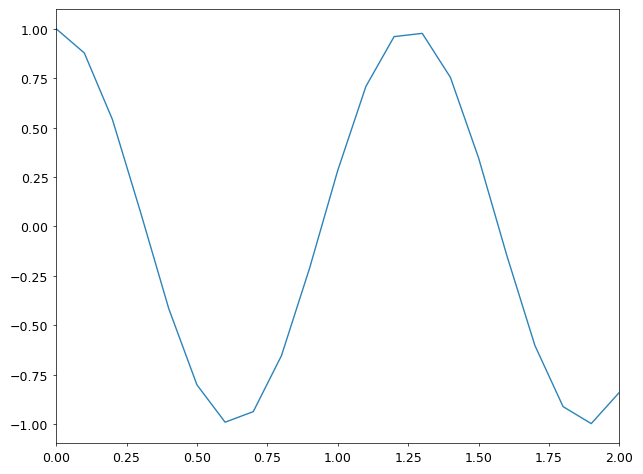

In [4]:
line_chart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
        },
    }
)

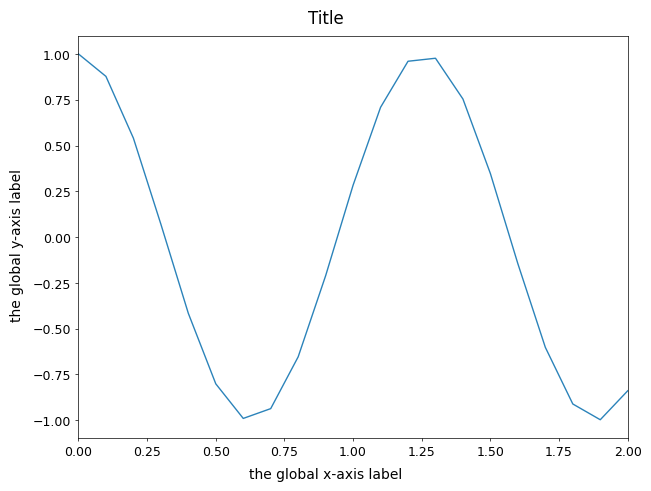

In [5]:
line_chart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
    }
)

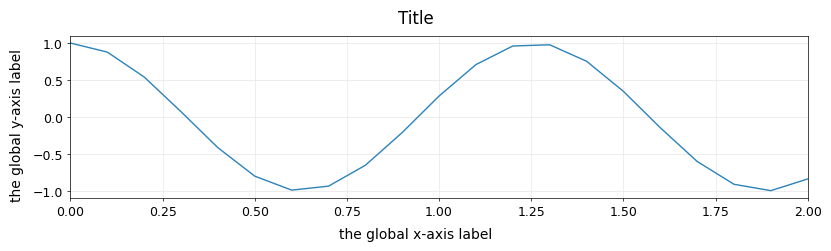

In [6]:
line_chart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  # must be a tuple (width, height), values are in inches
        "show_grid": "both",  # options: "both", "x", "y"
    }
)

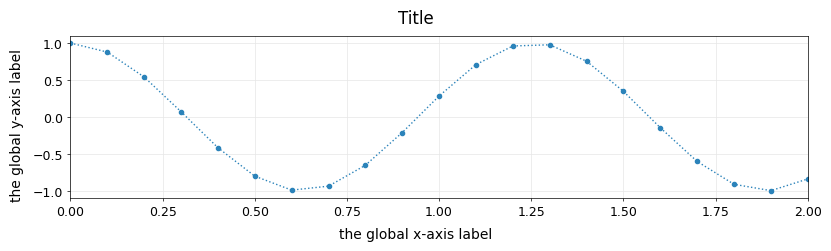

In [7]:
line_chart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
            "style": {  # define the style of the lines
                "plot.line.marker": LineMarker.POINT,
                "plot.line.style": LineStyle.DOTTED,
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "both",
    }
)

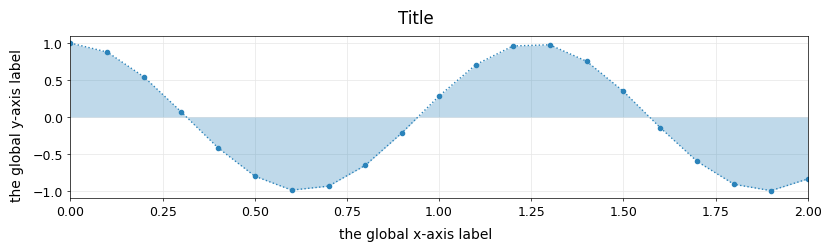

In [8]:
line_chart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
            "style": {
                "plot.line.marker": LineMarker.POINT,
                "plot.line.style": LineStyle.DOTTED,
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "both",
        "show_area": True,  # shows the area between the line and y=0
    }
)

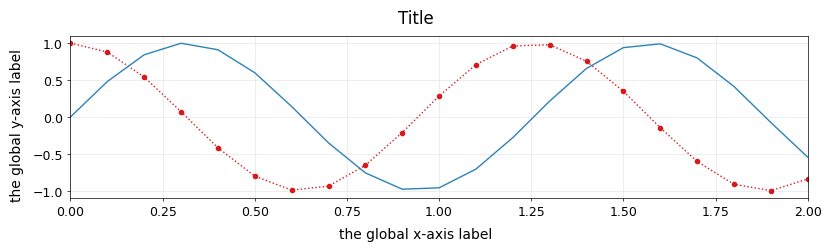

In [9]:
line_chart(
    {
        # use a list of charts to define multiple lines
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot.line.marker": LineMarker.POINT,
                    "plot.line.style": LineStyle.DOTTED,
                },
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "both",
    }
)

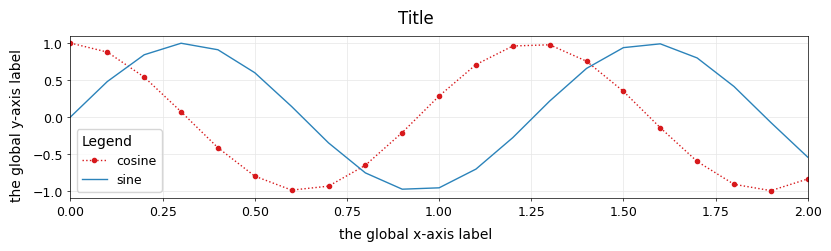

In [10]:
line_chart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot.line.marker": LineMarker.POINT,
                    "plot.line.style": LineStyle.DOTTED,
                },
                "subtitle": "cosine",  # add a subtitle to the line
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
                "subtitle": "sine",  # add a subtitle to the line
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "both",
        "show_legend": True,  # show the legend
    }
)

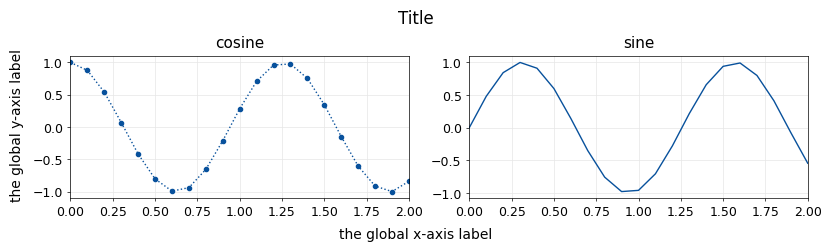

In [11]:
line_chart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot.line.marker": LineMarker.POINT,
                    "plot.line.style": LineStyle.DOTTED,
                },
                "subtitle": "cosine", 
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
                "subtitle": "sine", 
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,  # show each chart in its own subplot
        "show_grid": "both",
    }
)

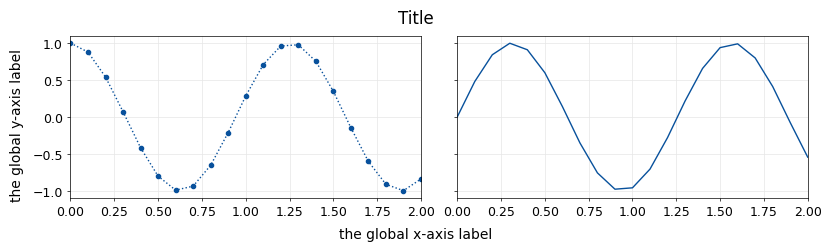

In [12]:
line_chart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot.line.marker": LineMarker.POINT,
                    "plot.line.style": LineStyle.DOTTED,
                },
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "sharex": True,  # share the x-axis across all subplots
        "sharey": True,  # share the y-axis across all subplots
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,
        "show_grid": "both",
    }
)

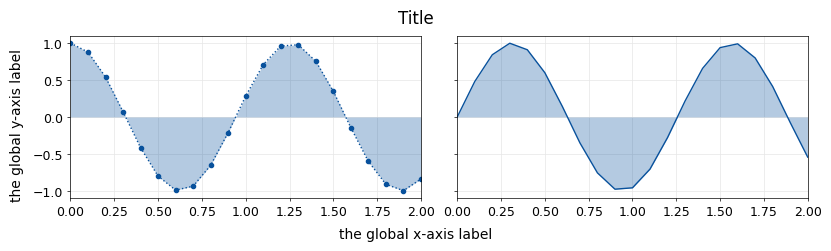

In [13]:
line_chart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot.line.marker": LineMarker.POINT,
                    "plot.line.style": LineStyle.DOTTED,
                },
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "sharex": True,
        "sharey": True,
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,
        "show_grid": "both",
        "show_area": True,  # show area between the line and y=0 for all subplots
    }
)

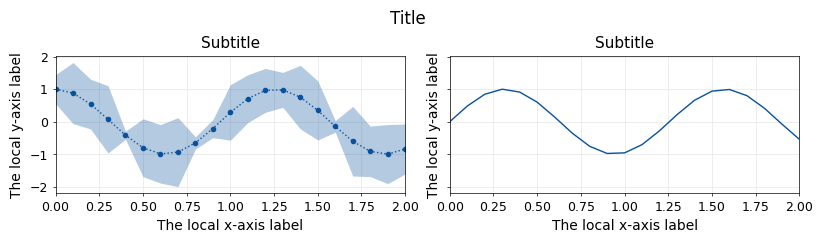

In [14]:
line_chart(
    {
        "charts": [
            {
                "data": [
                    # add the error values for each point's y value
                    {"x": x / 10, "y": np.cos(x / 2), "yerr": 0.1 + random.random()}
                    for x in range(21)
                ],
                "style": {
                    "plot.line.marker": LineMarker.POINT,
                    "plot.line.style": LineStyle.DOTTED,
                },
                "subtitle": "Subtitle",
                "xlabel": "The local x-axis label",  # add local subplot x-axis label
                "ylabel": "The local y-axis label",  # add local subplot y-axis label
            },
            {
                "data": [
                    # note: not all lines require to have the error values
                    {"x": x / 10, "y": np.sin(x / 2)}
                    for x in range(21)
                ],
                "subtitle": "Subtitle",
                "xlabel": "The local x-axis label",  # add local subplot x-axis label
                "ylabel": "The local y-axis label",  # add local subplot y-axis label
            },
        ],
        "title": "Title",
        # "xlabel": "the global x-axis label",
        # "ylabel": "the global y-axis label",
        "sharex": True,
        "sharey": True,
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,
        "show_grid": "both",
        "show_yerr": True,  # show the confidence interval using the error values
    }
)

In [15]:
from config import config

In [16]:
# update the global configuration
# note: this will update the style for all charts
config.update_config(
    config={
        "font.general.sans-serif": ["Inter"],
        "font.title.weight": FontWeight.BOLD,
        "plot.line.style": LineStyle.SOLID,
        "axes.spines.top.visible": False,
        "axes.spines.left.visible": False,
        "axes.spines.right.visible": False,
        "axes.spines.width": 1,
    }
)

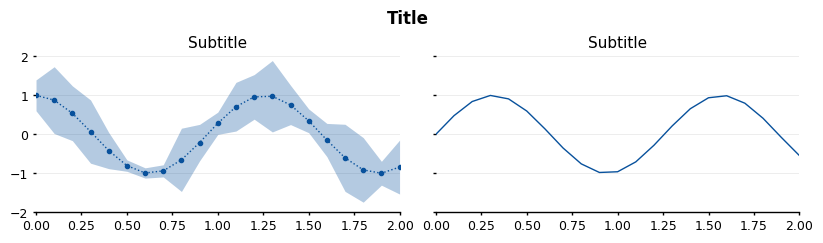

In [17]:
line_chart(
    {
        "charts": [
            {
                "data": [
                    {"x": x / 10, "y": np.cos(x / 2), "yerr": 0.1 + random.random()}
                    for x in range(21)
                ],
                "style": {
                    "plot.line.marker": LineMarker.POINT,
                    "plot.line.style": LineStyle.DOTTED,
                },
                "subtitle": "Subtitle",
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
                "subtitle": "Subtitle",
            },
        ],
        "title": "Title",
        "sharex": True,
        "sharey": True,
        "y_min": -2,  # the minimum value of the y-axis
        "y_max": 2,  # the maximum value of the y-axis
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,
        "show_grid": "y",
        "show_yerr": True,
    }
)

In [18]:
# resets the global configuration
config.reset_config()

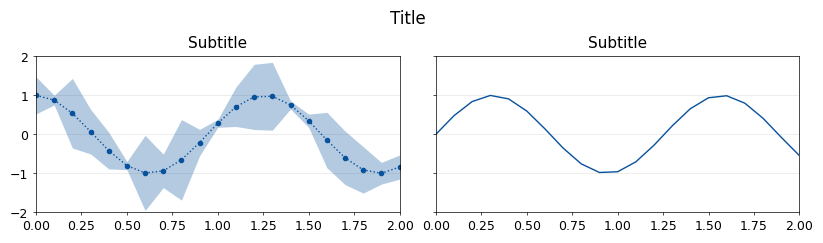

In [19]:
line_chart(
    {
        "charts": [
            {
                "data": [
                    {"x": x / 10, "y": np.cos(x / 2), "yerr": 0.1 + random.random()}
                    for x in range(21)
                ],
                "subtitle": "Subtitle",
                "style": {
                    "plot.line.marker": LineMarker.POINT,
                    "plot.line.style": LineStyle.DOTTED,
                },
            },
            {
                "data": [{"x": x / 10, "y": np.sin(x / 2)} for x in range(21)],
                "subtitle": "Subtitle",
            },
        ],
        "title": "Title",
        "sharex": True,
        "sharey": True,
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,
        "y_min": -2,
        "y_max": 2,
        "show_grid": "y",
        "show_yerr": True,
    }
)

# Use cases

- Performance metrics over time
- Training loss value
- AUC & ROC

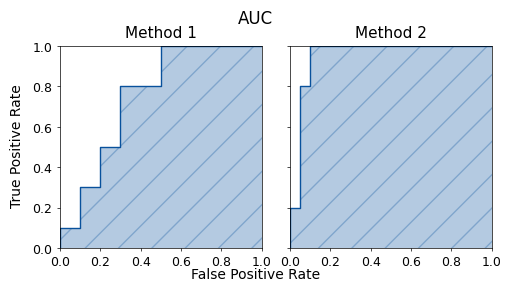

In [20]:
line_chart(
    {
        "charts": [
            {
                "data": [
                    {"tp": 0, "fp": 0},
                    {"tp": 0.1, "fp": 0},
                    {"tp": 0.1, "fp": 0.1},
                    {"tp": 0.3, "fp": 0.1},
                    {"tp": 0.3, "fp": 0.2},
                    {"tp": 0.5, "fp": 0.2},
                    {"tp": 0.5, "fp": 0.3},
                    {"tp": 0.8, "fp": 0.3},
                    {"tp": 0.8, "fp": 0.5},
                    {"tp": 1.0, "fp": 0.5},
                    {"tp": 1.0, "fp": 1.0},
                ],
                "subtitle": "Method 1",
                "x": "fp",  # specify which attr to use for x
                "y": "tp",  # specify which attr to use for y
                "style": {"plot.area.hatch": Hatch.DIAGONAL},
            },
            {
                "data": [
                    {"tp": 0, "fp": 0},
                    {"tp": 0.2, "fp": 0},
                    {"tp": 0.2, "fp": 0.05},
                    {"tp": 0.8, "fp": 0.05},
                    {"tp": 0.8, "fp": 0.1},
                    {"tp": 1.0, "fp": 0.1},
                    {"tp": 1.0, "fp": 1.0},
                ],
                "subtitle": "Method 2",
                "x": "fp",  # specify which attr to use for x
                "y": "tp",  # specify which attr to use for y
                "style": {"plot.area.hatch": Hatch.DIAGONAL},
            },
        ],
        "title": "AUC",
        "xlabel": "False Positive Rate",
        "ylabel": "True Positive Rate",
        "sharex": True,
        "sharey": True,
        "show_area": True,
        "subplots": True,
        "aspect_ratio": "equal",  # assign the aspect ratio of all subplots
        "figsize": (5, 2.8),
        "x_min": 0,  # the minimum value of the x-axis
        "x_max": 1,  # the maximum value of the x-axis
        "y_min": 0,  # the minimum value of the y-axis
        "y_max": 1,  # the maximum value of the y-axis
    }
)

In [21]:
config.update_config(config={"color.general.multiple": Colors.MixedDark})

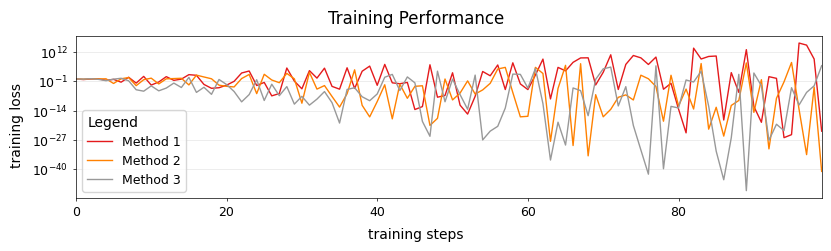

In [22]:
line_chart(
    {
        "charts": [
            {
                "data": [
                    {"step": step, "loss": (0.5 + random.random()) ** step}
                    for step in range(100)
                ],
                "x": "step",  # specify which attr to use for x
                "y": "loss",  # specify which attr to use for y
                "subtitle": "Method 1",
            },
            {
                "data": [
                    {"step": step, "loss": (0.3 + random.random()) ** step}
                    for step in range(100)
                ],
                "x": "step",  # specify which attr to use for x
                "y": "loss",  # specify which attr to use for y
                "subtitle": "Method 2",
            },
            {
                "data": [
                    {"step": step, "loss": (0.2 + random.random()) ** step}
                    for step in range(100)
                ],
                "x": "step",  # specify which attr to use for x
                "y": "loss",  # specify which attr to use for y
                "subtitle": "Method 3",
            },
        ],
        "title": "Training Performance",
        "xlabel": "training steps",
        "ylabel": "training loss",
        "subplots": False,
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "y",
        "show_legend": True,
        "log_scale": True,  # depict the y-axis as a log scale
    }
)